# make_mockobs_galaxycutout

run the noiseadding script on cutouts around a galaxy - looking at the CGM in the EAGLE simulation rather than the IGM.

In [54]:
%run 'make_mockobs.ipynb'

In [55]:
machine='coho'

In [56]:
resolution = None;  # This should prompt the script to just use the lowest resolution 

slicewidth = 20; 
CMOS = True; ROnoise= None; 
x_center = 50.5; y_center = 13.5

distance = '100Mpc'

## load the data for the different exposure times

****** Working on mock observation for distance 100Mpc ******
loading the data...
Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz exists, loading now...
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,6.40094057981 appended.
DEBUG: the resolution outputted from load_data is 6.40094057981
extracting the FOV...
making a mask for the data


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The current mask is [[-0.5609471201896667 -0.5673826336860657 -0.5707893371582031 ...,
  -1.6017686128616333 -1.5907478332519531 -1.580721139907837]
 [-0.5927731990814209 -0.6027000546455383 -0.6099472641944885 ...,
  -1.6161918640136719 -1.6040723323822021 -1.5926581621170044]
 [-0.6216232180595398 -0.6346660852432251 -0.6453272104263306 ...,
  -1.6309171915054321 -1.61774742603302 -1.6050255298614502]
 ..., 
 [-1.5873242616653442 -1.5931445360183716 -1.5988320112228394 ...,
  -2.086695671081543 -2.0889346599578857 -2.090973138809204]
 [-1.5847303867340088 -1.5903996229171753 -1.595850944519043 ...,
  -2.0886385440826416 -2.0909883975982666 -2.0931239128112793]
 [-1.5825705528259277 -1.5880998373031616 -1.593294382095337 ...,
  -2.0907442569732666 -2.093170166015625 -2.0953640937805176]]
adding noise to the data...
******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 6.40094057981


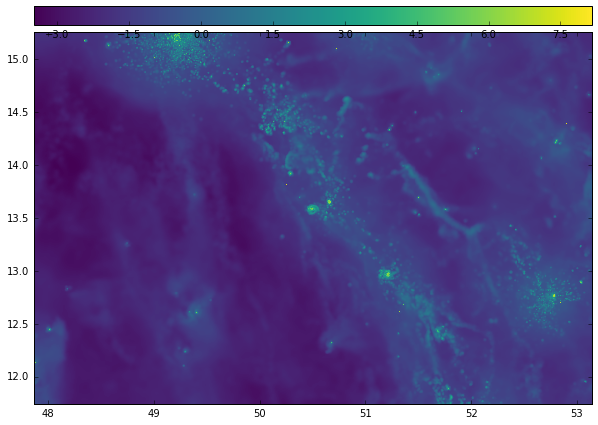

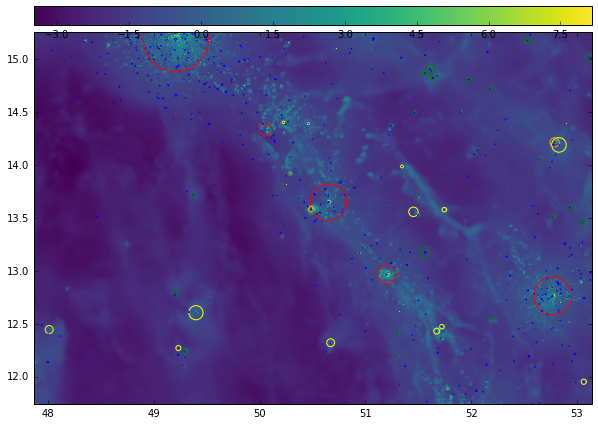

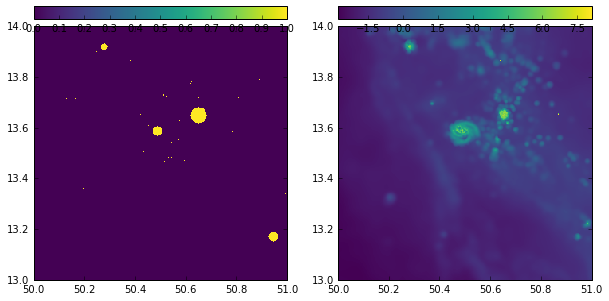

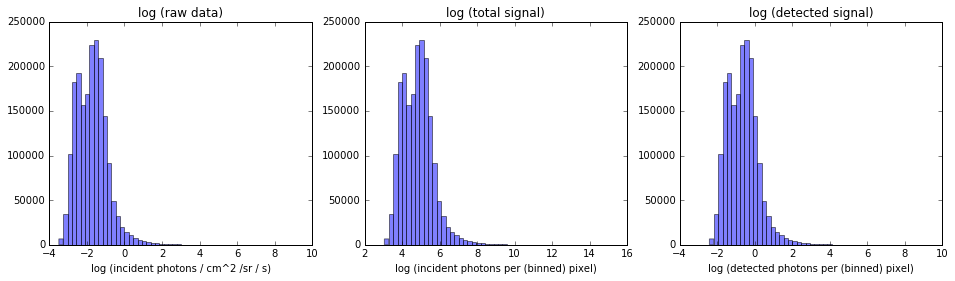

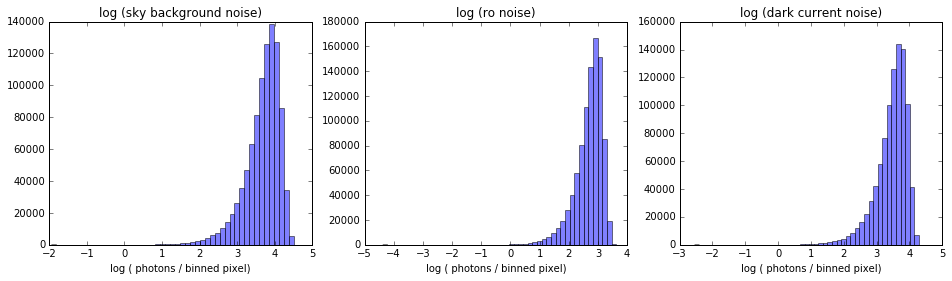

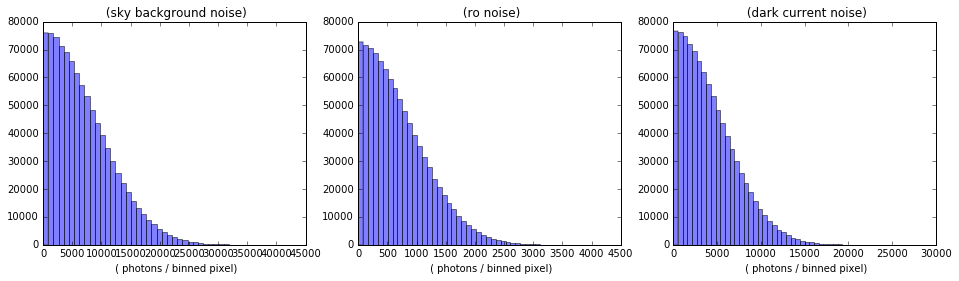

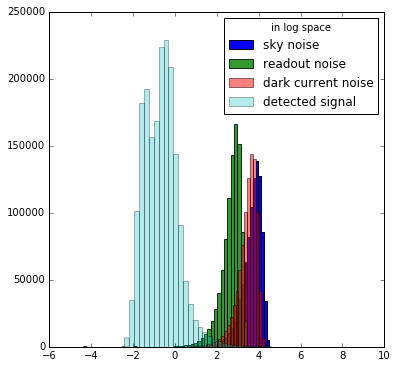

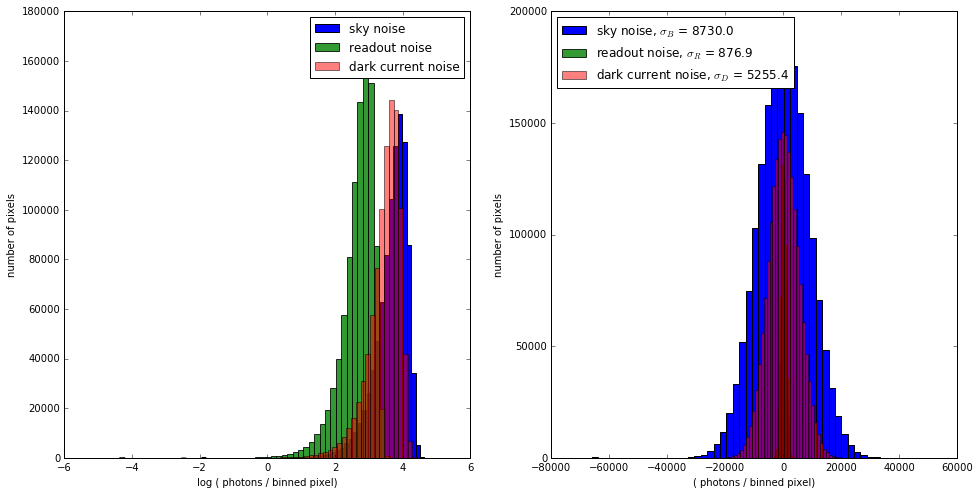

In [57]:
exptime = 1000.*60.*60.; 
stuff_1000 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,includemeannoise=True,\
                           x_center=x_center,y_center=y_center,mask=True,debug=True,plotchecks=True)
data_FOV_1000, xystarts_1000, size_1000, noiseadded_signal_1000, B_sky_array_1000, R_array_1000,D_array1000, mask_1000 = stuff_1000

****** Working on mock observation for distance 100Mpc ******
loading the data...
Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz exists, loading now...
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,6.40094057981 appended.
DEBUG: the resolution outputted from load_data is 6.40094057981
extracting the FOV...
making a mask for the data


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The current mask is [[-0.5609471201896667 -0.5673826336860657 -0.5707893371582031 ...,
  -1.6017686128616333 -1.5907478332519531 -1.580721139907837]
 [-0.5927731990814209 -0.6027000546455383 -0.6099472641944885 ...,
  -1.6161918640136719 -1.6040723323822021 -1.5926581621170044]
 [-0.6216232180595398 -0.6346660852432251 -0.6453272104263306 ...,
  -1.6309171915054321 -1.61774742603302 -1.6050255298614502]
 ..., 
 [-1.5873242616653442 -1.5931445360183716 -1.5988320112228394 ...,
  -2.086695671081543 -2.0889346599578857 -2.090973138809204]
 [-1.5847303867340088 -1.5903996229171753 -1.595850944519043 ...,
  -2.0886385440826416 -2.0909883975982666 -2.0931239128112793]
 [-1.5825705528259277 -1.5880998373031616 -1.593294382095337 ...,
  -2.0907442569732666 -2.093170166015625 -2.0953640937805176]]
adding noise to the data...
******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 6.40094057981


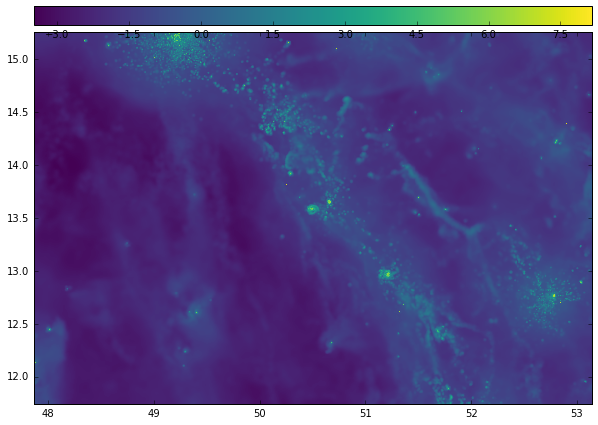

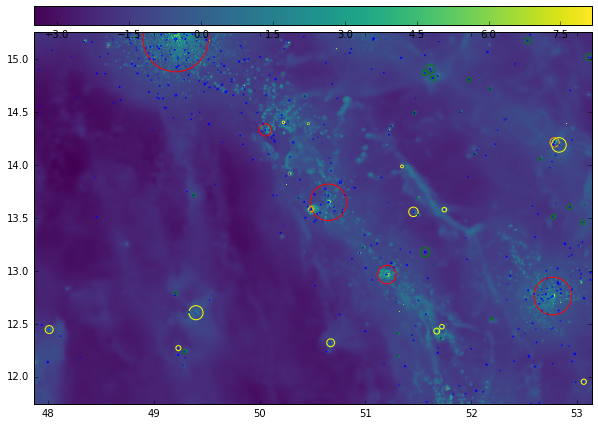

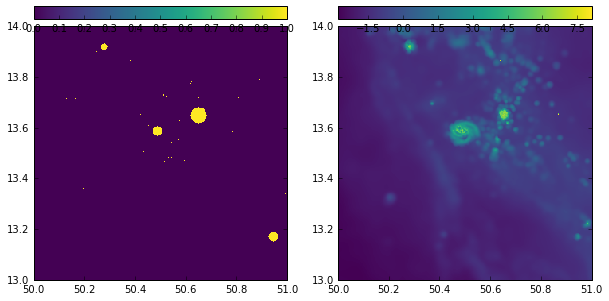

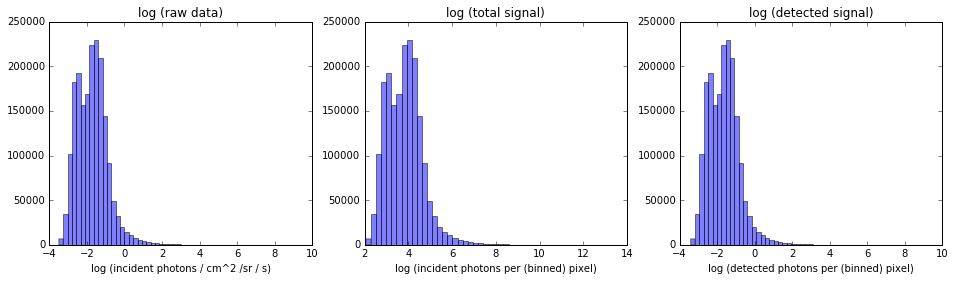

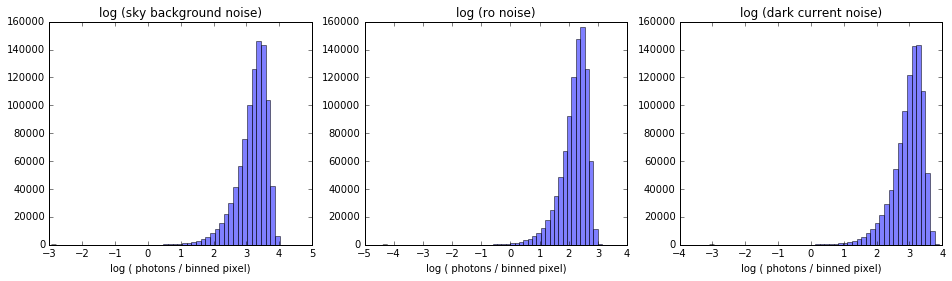

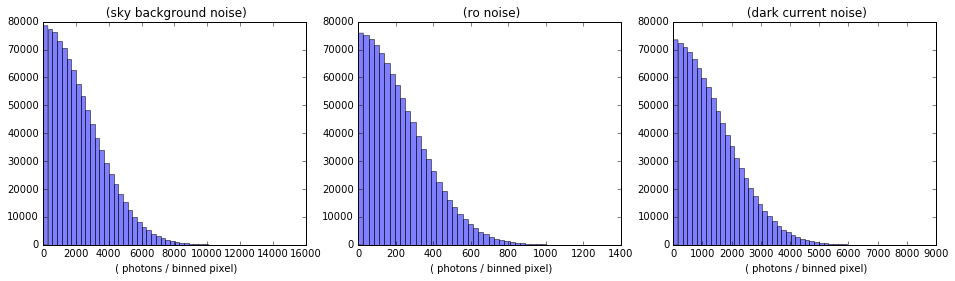

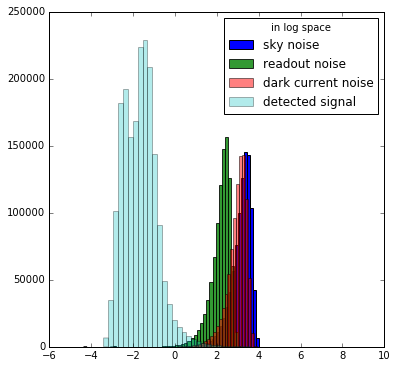

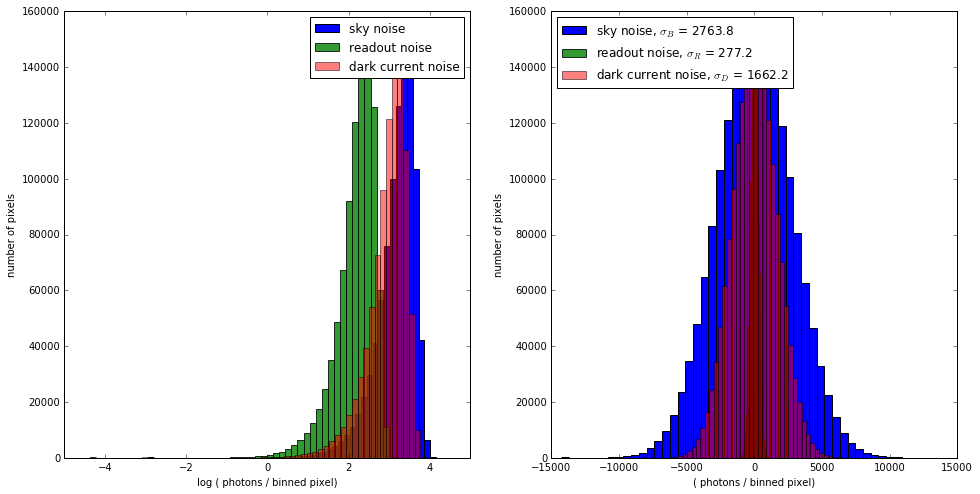

In [58]:
exptime = 100.*60.*60.; 
stuff_100 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,includemeannoise=True,\
                           x_center=x_center,y_center=y_center,mask=True,debug=True,plotchecks=True)
data_FOV_100, xystarts_100, size_100, noiseadded_signal_100, B_sky_array_100, R_array_100,D_array100, mask_100 = stuff_100

****** Working on mock observation for distance 100Mpc ******
loading the data...
Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz exists, loading now...
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,6.40094057981 appended.
DEBUG: the resolution outputted from load_data is 6.40094057981
extracting the FOV...
making a mask for the data


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The current mask is [[-0.5609471201896667 -0.5673826336860657 -0.5707893371582031 ...,
  -1.6017686128616333 -1.5907478332519531 -1.580721139907837]
 [-0.5927731990814209 -0.6027000546455383 -0.6099472641944885 ...,
  -1.6161918640136719 -1.6040723323822021 -1.5926581621170044]
 [-0.6216232180595398 -0.6346660852432251 -0.6453272104263306 ...,
  -1.6309171915054321 -1.61774742603302 -1.6050255298614502]
 ..., 
 [-1.5873242616653442 -1.5931445360183716 -1.5988320112228394 ...,
  -2.086695671081543 -2.0889346599578857 -2.090973138809204]
 [-1.5847303867340088 -1.5903996229171753 -1.595850944519043 ...,
  -2.0886385440826416 -2.0909883975982666 -2.0931239128112793]
 [-1.5825705528259277 -1.5880998373031616 -1.593294382095337 ...,
  -2.0907442569732666 -2.093170166015625 -2.0953640937805176]]
adding noise to the data...
******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 6.40094057981


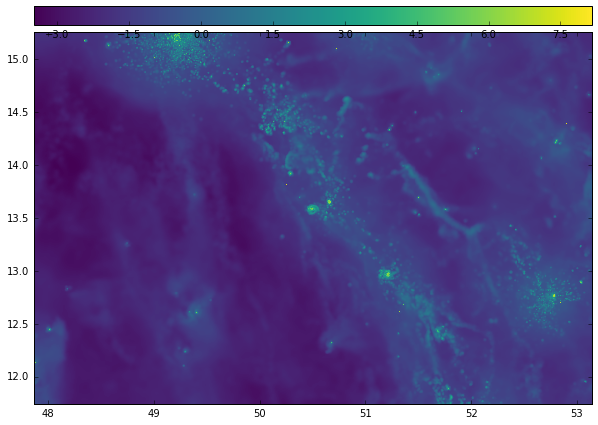

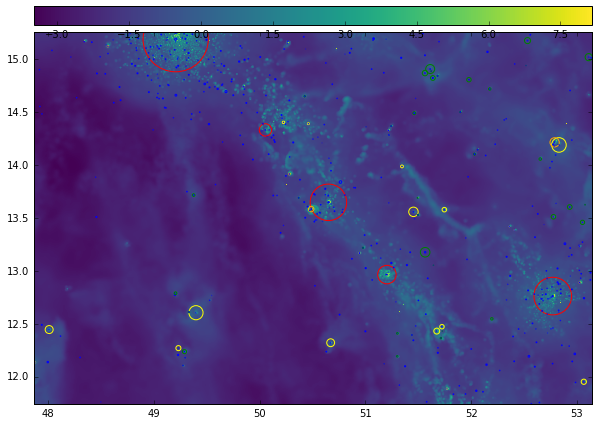

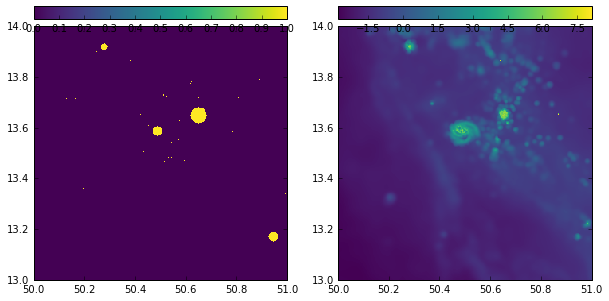

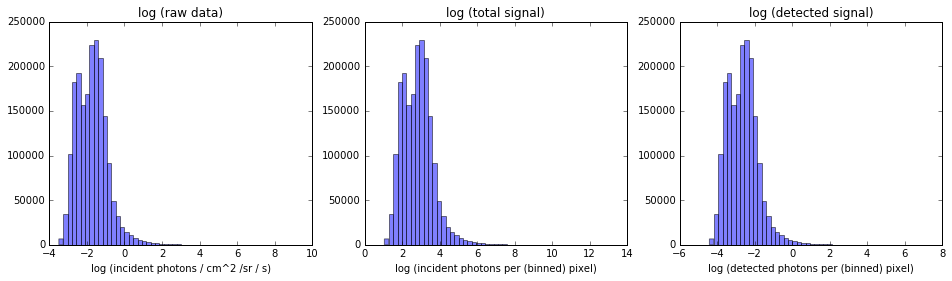

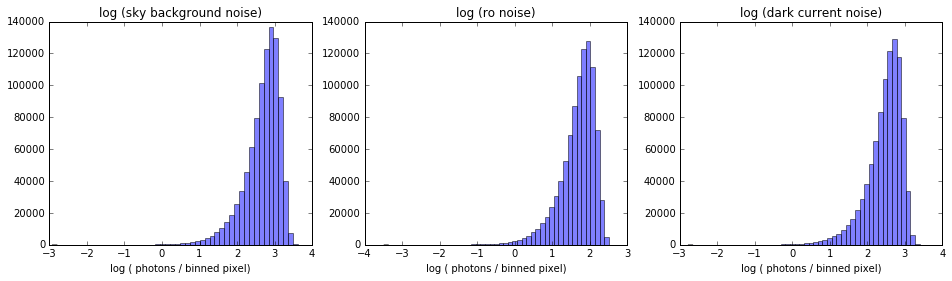

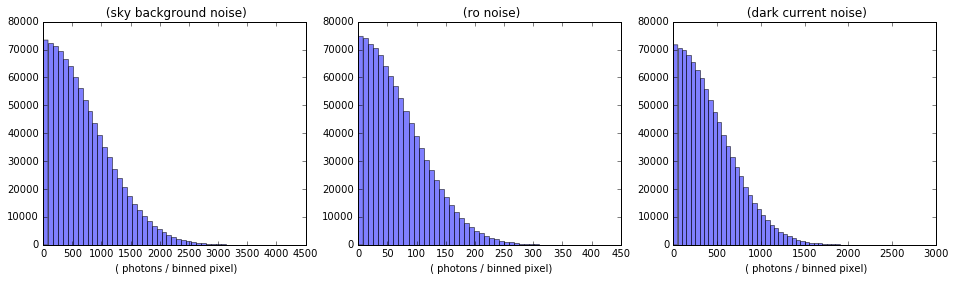

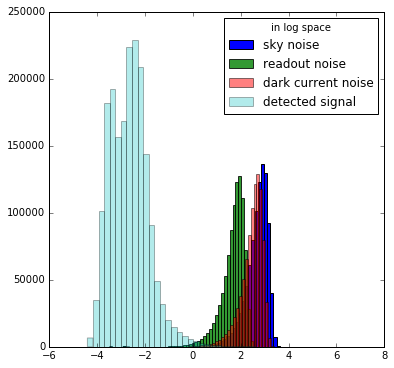

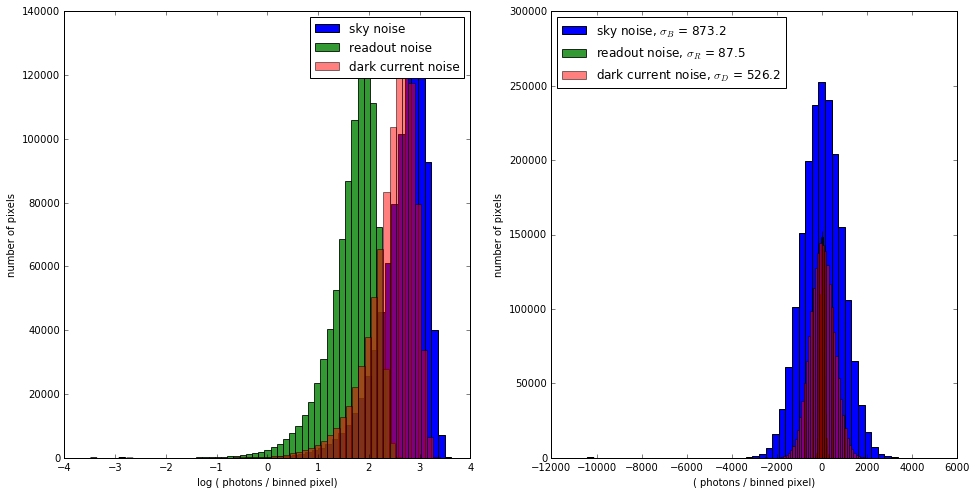

In [59]:
exptime = 10.*60.*60.; 
stuff_10 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,includemeannoise=True,\
                           x_center=x_center,y_center=y_center,mask=True,debug=True,plotchecks=True)
data_FOV_10, xystarts_10, size_10, noiseadded_signal_10, B_sky_array_10, R_array_10,D_array10, mask_10 = stuff_10

(1688, 1124) (1688, 1124) (1688, 1124) (1688, 1124)
(1688, 1124) (1688, 1124) (1688, 1124) (1688, 1124)
(1688, 1124) (1688, 1124) (1688, 1124) (1688, 1124)


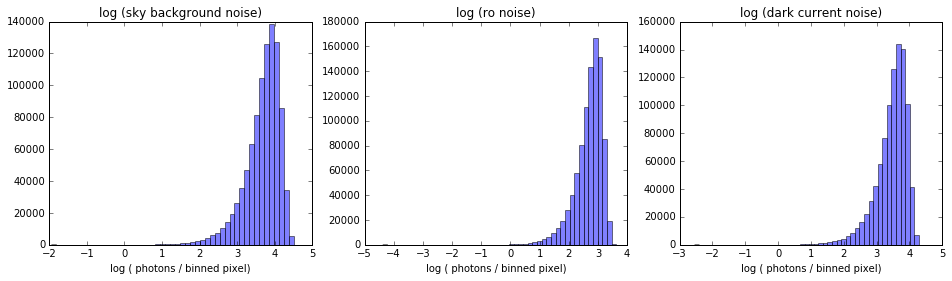

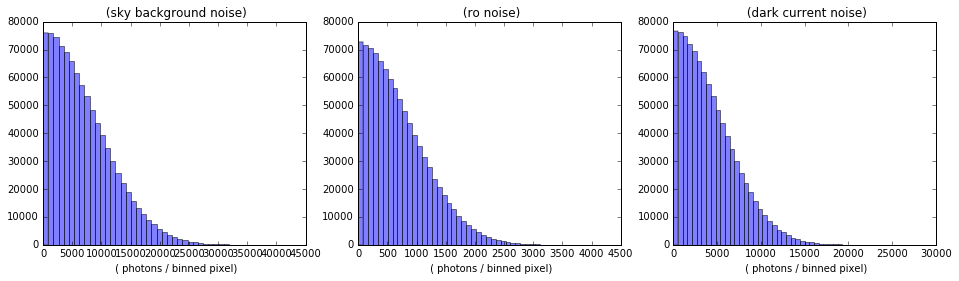

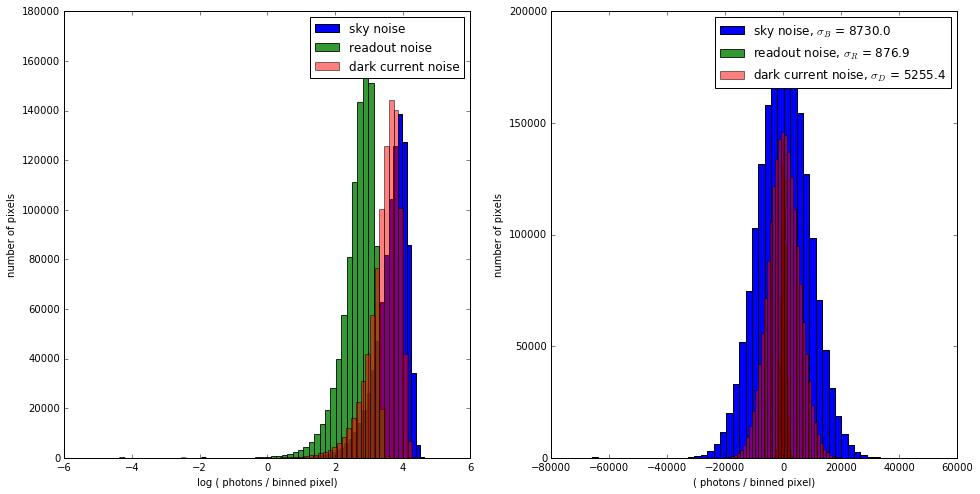

In [60]:
print data_FOV_1000.shape, B_sky_array_1000.shape, R_array_1000.shape, D_array1000.shape
print data_FOV_100.shape, B_sky_array_100.shape, R_array_100.shape, D_array100.shape
print data_FOV_10.shape, B_sky_array_10.shape, R_array_10.shape, D_array10.shape

plotchecks(B_sky_array_1000, R_array_1000, D_array1000)

In [61]:
def makemaskedcutouts(data_FOV,noiseadded_signal,mask,size=150.):
    """
    Cutout an area from the EAGLE simulation
    data_FOV:           raw simulation
    noiseadded_signal:  mock observation
    mask:               mask
    size:               spatial length of one side of the cutout box, in kpc
    Assumes that the resolution is the base resolution (0.003125 Mpc per pixel)
    """
    pixsize = size/1000. / 0.003125
    midx = 840
    midy = 590
    # masked simulation
    mx_simulation = np.ma.masked_array(data_FOV, mask=mask)
    rawsimmasked_cutout = mx_simulation[midx-pixsize/2.:midx+pixsize/2.,midy-pixsize/2.:midy+pixsize/2.]
    # masked mock observation
    mx_noisy = np.ma.masked_array(noiseadded_signal, mask=mask)
    noisemasked_cutout = mx_noisy[midx-pixsize/2.:midx+pixsize/2.,midy-pixsize/2.:midy+pixsize/2.]

    return rawsimmasked_cutout, noisemasked_cutout

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


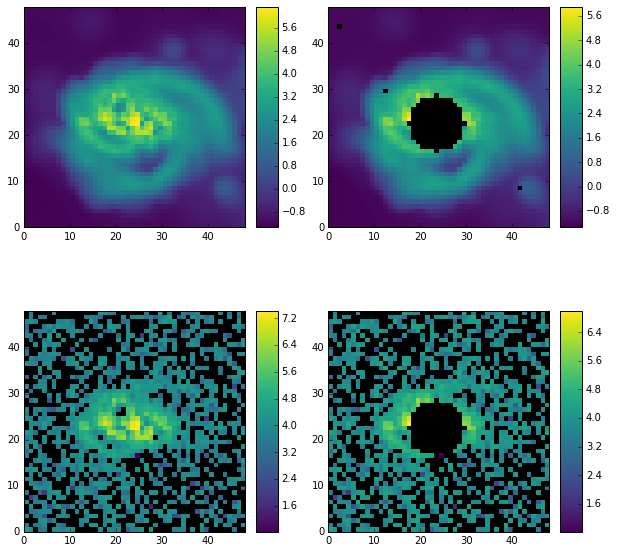

In [62]:
rawsimmasked_cutout_1000, noisemasked_cutout_1000 = makemaskedcutouts(data_FOV_1000,noiseadded_signal_1000,mask_1000)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10, 10))
plotdata(rawsimmasked_cutout_1000.data.T,ax=ax1,colorbar=True)#,bounds=bounds)
plotdata(rawsimmasked_cutout_1000.T,ax=ax2,colorbar=True)#,bounds=bounds)
plotdata(np.log10(noisemasked_cutout_1000.data-768000.0-27648000.0-76310797.0337).T,ax=ax3,colorbar=True)#,bounds=bounds)
plotdata(np.log10(noisemasked_cutout_1000-768000.0-27648000.0-76310797.0337).T,ax=ax4,colorbar=True)#,bounds=bounds)


In [63]:
def makemap(SBdata,ax,extent=None,colmap='viridis',onlyyellow=False,contours=False,colorbar=False,mockobs=False,labelaxes=False,label=''):
    if extent is None:
        extent = [0,SBdata.shape[0],0,SBdata.shape[1]]
    
    # setting up the plot
    if mockobs:
        clabel = r'log signal (photons)'
    else:
        clabel = r'log photons/cm$^2$/s/sr'
    fontsize=13

    if labelaxes:
        ax.set_xlabel(r'X [kpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [kpc]',fontsize=fontsize)
        ax.locator_params(axis='y', nticks=3)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
        ax.xaxis.set_label_position('top') 
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('bottom') 
        ax.xaxis.tick_bottom()
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value

    img = ax.imshow(SBdata.T,origin='lower',cmap=cm.get_cmap(colmap), interpolation='nearest', extent=extent)

    div = axgrid.make_axes_locatable(ax)
    # plot colorbar
    if colorbar:
        cax = div.append_axes("bottom",size="15%",pad=0.1)
        cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
        cbar.solids.set_edgecolor("face")
        cbar.ax.set_xlabel(r'%s' % (clabel), fontsize=fontsize)
        #cbar.ax.set_ylabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.tick_params(labelsize=fontsize)
    
    font = {'family': 'serif',
        'color':  'yellow',
        'weight': 'bold',
        'size': 12,
        }
    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

    # Bottom middle
#    ax.text(1.8,0.8,label,fontdict=font,horizontalalignment='center',backgroundcolor='white')
    ax.text(0.98,0.8,label,fontdict=font,horizontalalignment='right',backgroundcolor='white',transform=ax.transAxes)

def plotimgnice(SBdata_exp0,ax,mymap='gist_gray',label='',mask=None,extent=None,labelaxes=False):
    """
    If the data is masked it's going to look weird because of limit changing going on here
    Pass the mask to this script and it will reapply the mask to the data after messing around with the limits to make
    the plot look nice.
    """
    # Plot the data nicely
    median = np.median(SBdata_exp0);
    sig = np.sqrt(median)

    mymax = median + 40*sig
    mymin = median - 5*sig

    SBdata_clipped = SBdata_exp0 + 0
    SBdata_clipped[SBdata_clipped < mymin] = mymin
    SBdata_clipped[SBdata_clipped > mymax] = mymax
    SBdata_clipped = SBdata_clipped - mymin
    
    if mask is not None:
        SBdata_clipped[mask]=0
    
    #get_halpha_SB.makemapfilament(np.log10(SBdata_clipped**0.5),ax,contours=False,mockobs=True,\
    #                              colmap=mymap,label=label,labelaxes=True)
    makemap(np.log10(SBdata_clipped**0.5),ax,contours=False,mockobs=True,colmap=mymap,label=label,\
            labelaxes=labelaxes,extent=extent)

    
def plotnewnice(maskeddata,ax,exptime=1000.,withmask=False):
    R=None;D=None;B=None
    if exptime == 1000.:
        R = 768000.0; D = 27648000.0; B = 76310797.0337
    if exptime == 100.:
        R = 76800.0; D = 2764800.0; B = 7631079.70337
    if exptime == 10.:
        R = 7680.0; D = 276480.0; B = 763107.970337
    totalnoise = R+D+B
    
    if withmask:
        median = np.median(maskeddata); sig = np.sqrt(median)
        SBdata_clipped = maskeddata - totalnoise
        SBdata_clipped = SBdata_clipped + 3*sig
        plotdata(np.log10(SBdata_clipped).T,ax=ax,colorbar=False)#,bounds=bounds)
    else:
        median = np.median(maskeddata); sig = np.sqrt(median)
        SBdata_clipped = maskeddata.data - totalnoise
        SBdata_clipped = SBdata_clipped + 3*sig
        plotdata(np.log10(SBdata_clipped).T,ax=ax,colorbar=False)#,bounds=bounds)

        
def plotimgnice2(SBdata_exp0,ax,extent=None,mymap='gist_gray',label='',mask=None,labelaxes=False):
    """
    If the data is masked it's going to look weird because of limit changing going on here
    Pass the mask to this script and it will reapply the mask to the data after messing around with the limits to make
    the plot look nice.
    """
    # Plot the data nicely
    median = np.median(SBdata_exp0);
    sig = np.sqrt(median)

    mymax = median + 10*sig
    mymin = median - 3*sig

    mymin = np.min(SBdata_exp0)
    
  #  mymin = np.min(SBdata_exp0) + sig

    print 'actual min: %s'%np.min(SBdata_exp0)
    print 'mymin: %s'%mymin 
    
    SBdata_clipped = SBdata_exp0 + 0
    SBdata_clipped[SBdata_clipped < mymin] = mymin
    SBdata_clipped[SBdata_clipped > mymax] = mymax
    SBdata_clipped = SBdata_clipped - mymin
    
    if mask is not None:
        SBdata_clipped[mask]=0
    
    #get_halpha_SB.makemapfilament(np.log10(SBdata_clipped**0.5),ax,contours=False,mockobs=True,\
    #                              colmap=mymap,label=label,labelaxes=True)
    makemap(np.log10(SBdata_clipped**0.02),ax,contours=False,mockobs=True,colmap=mymap,label=label,\
            labelaxes=labelaxes,extent=extent)


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:135: RuntimeWarning: divide by zero encountered in log10


actual min: 104693440.776
mymin: 104693440.776
actual min: 104693440.776
mymin: 104693440.776


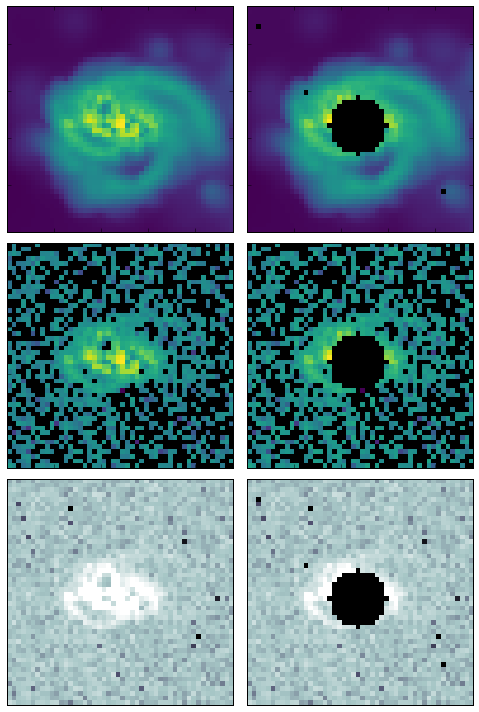

In [64]:

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(7, 10))
plotdata(rawsimmasked_cutout_1000.data.T,ax=ax1,colorbar=False)#,bounds=bounds)
plotdata(rawsimmasked_cutout_1000.T,ax=ax2,colorbar=False)#,bounds=bounds)
plotdata(np.log10(noisemasked_cutout_1000.data-768000.0-27648000.0-76310797.0337).T,ax=ax3,colorbar=False)#,bounds=bounds)
#plotnewnice(noisemasked_cutout_1000,ax3,exptime=1000.)
plotdata(np.log10(noisemasked_cutout_1000-768000.0-27648000.0-76310797.0337).T,ax=ax4,colorbar=False)#,bounds=bounds)
#makemap (np.log10((noisemasked_cutout_1000.data-768000.0-27648000.0-76310797.0337)**0.5),ax4,mockobs=True,labelaxes=False)

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xticklabels([])
    ax.set_xlabel('')
    ax.set_yticklabels([])
    ax.set_ylabel('')


map = 'bone'; label = 'noise added + mask'; 
plotimgnice2(noisemasked_cutout_1000.data,ax5,mymap=map)
plotimgnice2(noisemasked_cutout_1000,ax6,mymap=map,mask=noisemasked_cutout_1000.mask)

plt.tight_layout()

So the first ones are actually way easier to see the tail - this is probably because it has nicely subtracted off the mean noise.  But on the other hand it has values that are below zero that are showing up abruptly.  Maybe try a different colour map?

In [65]:
def plotimgnice3(SBdata_exp0,ax,extent=None,mymap='gist_gray',label='',mask=None,labelaxes=False):
    """
    If the data is masked it's going to look weird because of limit changing going on here
    Pass the mask to this script and it will reapply the mask to the data after messing around with the limits to make
    the plot look nice.
    """
    # Plot the data nicely
    median = np.median(SBdata_exp0);
    sig = np.sqrt(median)

    mymax = median + 30*sig
    mymin = median - 3*sig

    mymin = np.min(SBdata_exp0)
    
    mymin = np.min(SBdata_exp0) + sig

    print 'actual min: %s'%np.min(SBdata_exp0)
    print 'mymin: %s'%mymin 
    
    SBdata_clipped = SBdata_exp0 + 0
    SBdata_clipped[SBdata_clipped < mymin] = mymin
    SBdata_clipped[SBdata_clipped > mymax] = mymax
    SBdata_clipped = SBdata_clipped - mymin
    
    if mask is not None:
        SBdata_clipped[mask]=0
    
    #get_halpha_SB.makemapfilament(np.log10(SBdata_clipped**0.5),ax,contours=False,mockobs=True,\
    #                              colmap=mymap,label=label,labelaxes=True)
    makemap(np.log10(SBdata_clipped**0.02),ax,contours=False,mockobs=True,colmap=mymap,label=label,\
            labelaxes=labelaxes,extent=extent)



/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:135: RuntimeWarning: divide by zero encountered in log10


actual min: 10462209.3939
mymin: 10462209.3939
actual min: 10462209.3939
mymin: 10462209.3939


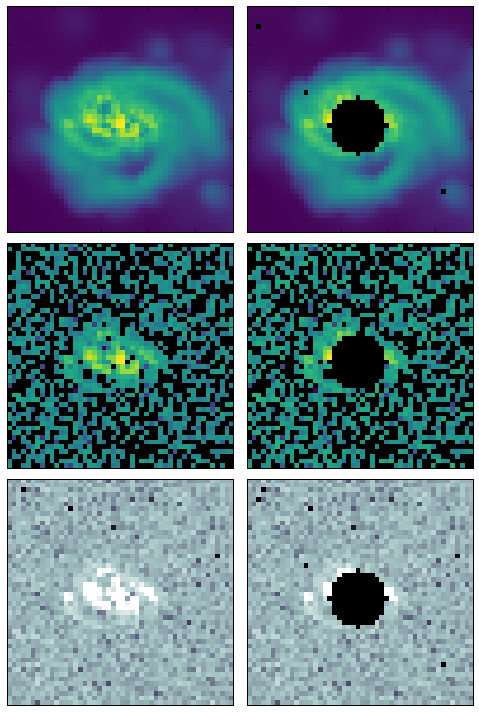

In [83]:
rawsimmasked_cutout_100, noisemasked_cutout_100 = makemaskedcutouts(data_FOV_100,noiseadded_signal_100,mask_100)

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(7, 10))
plotdata(rawsimmasked_cutout_100.data.T,ax=ax1,colorbar=False)#,bounds=bounds)
plotdata(rawsimmasked_cutout_100.T,ax=ax2,colorbar=False)#,bounds=bounds)
plotdata(np.log10(noisemasked_cutout_100.data-76800.0-2764800.0-7631079.70337).T,ax=ax3,colorbar=False)#,bounds=bounds)
plotdata(np.log10(noisemasked_cutout_100-76800.0-2764800.0-7631079.70337).T,ax=ax4,colorbar=False)#,bounds=bounds)
#plotimgnice3(noisemasked_cutout_100.data,ax3,mymap=map)
#plotimgnice3(noisemasked_cutout_100,ax4,mymap=map,mask=noisemasked_cutout_100.mask)

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xticklabels([])
    ax.set_xlabel('')
    ax.set_yticklabels([])
    ax.set_ylabel('')

map = 'bone'; label = 'noise added + mask'; 
plotimgnice2(noisemasked_cutout_100.data,ax5,mymap=map)
plotimgnice2(noisemasked_cutout_100,ax6,mymap=map,mask=noisemasked_cutout_100.mask)

plt.tight_layout()

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in log10


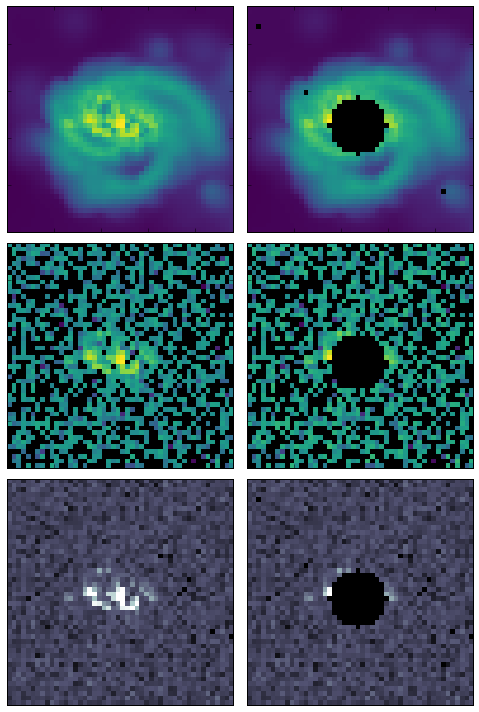

In [67]:
rawsimmasked_cutout_10, noisemasked_cutout_10 = makemaskedcutouts(data_FOV_10,noiseadded_signal_10,mask_10)


fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(7, 10))
plotdata(rawsimmasked_cutout_10.data.T,ax=ax1,colorbar=False)#,bounds=bounds)
plotdata(rawsimmasked_cutout_10.T,ax=ax2,colorbar=False)#,bounds=bounds)
plotdata(np.log10(noisemasked_cutout_10.data-7680.0-276480.0-763107.970337).T,ax=ax3,colorbar=False)#,bounds=bounds)
plotdata(np.log10(noisemasked_cutout_10-7680.0-276480.0-763107.970337).T,ax=ax4,colorbar=False)#,bounds=bounds)

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xticklabels([])
    ax.set_xlabel('')
    ax.set_yticklabels([])
    ax.set_ylabel('')
    
map = 'bone'; label = 'noise added + mask'; 
plotimgnice(noisemasked_cutout_10.data,ax5,mymap=map)
plotimgnice(noisemasked_cutout_10,ax6,mymap=map,mask=noisemasked_cutout_10.mask)

plt.tight_layout()

[-75.0, 75.0, -75.0, 75.0]
actual min: 1044191.10437
mymin: 1045214.51419
actual min: 1044191.10437
mymin: 1045214.51419
actual min: 10462209.3939
mymin: 10465445.6057
actual min: 10462209.3939
mymin: 10465445.6057
actual min: 104693440.776
mymin: 104703674.488
actual min: 104693440.776
mymin: 104703674.488


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10


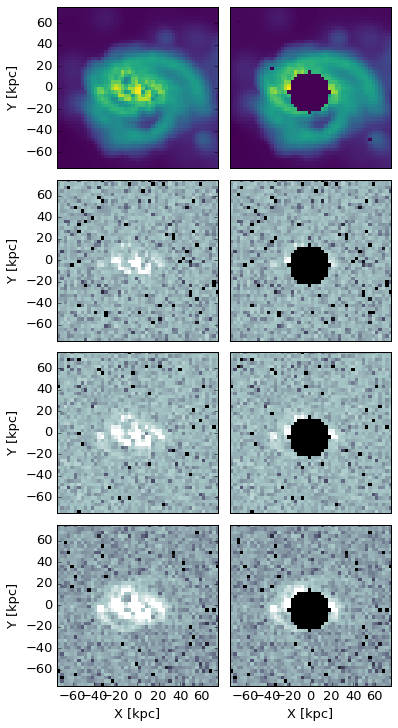

In [95]:
size = 150.
extent = [-150./2.,150./2.,-150./2.,150./2.]
print extent
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4, 2, figsize=(6, 13))
#plotdata(rawsimmasked_cutout_10.data.T,ax=ax1,colorbar=False,extent=extent)#,bounds=bounds)
#plotdata(rawsimmasked_cutout_10.T,ax=ax2,colorbar=False,extent=extent)#,bounds=bounds)
makemap(rawsimmasked_cutout_10.data,ax=ax1,colorbar=False,extent=extent,labelaxes=True)#,bounds=bounds)
makemap(rawsimmasked_cutout_10,ax=ax2,colorbar=False,extent=extent,labelaxes=True)#,bounds=bounds)
  
map = 'bone'; label = 'noise added + mask'; 
#plotimgnice2(noisemasked_cutout_10.data,ax3,mymap=map,extent=extent,labelaxes=True)
#plotimgnice2(noisemasked_cutout_10,ax4,mymap=map,mask=noisemasked_cutout_10.mask,extent=extent,labelaxes=True)
plotimgnice4(noisemasked_cutout_10.data,ax3,mymap=map,extent=extent,labelaxes=True)
plotimgnice4(noisemasked_cutout_10,ax4,mymap=map,mask=noisemasked_cutout_10.mask,extent=extent,labelaxes=True)

#plotimgnice3(noisemasked_cutout_100.data,ax5,mymap=map,extent=extent,labelaxes=True)
#plotimgnice3(noisemasked_cutout_100,ax6,mymap=map,mask=noisemasked_cutout_100.mask,extent=extent,labelaxes=True)
plotimgnice4(noisemasked_cutout_100.data,ax5,mymap=map,extent=extent,labelaxes=True)
plotimgnice4(noisemasked_cutout_100,ax6,mymap=map,mask=noisemasked_cutout_100.mask,extent=extent,labelaxes=True)

#plotimgnice2(noisemasked_cutout_1000.data,ax7,mymap=map,extent=extent,labelaxes=True)
#plotimgnice2(noisemasked_cutout_1000,ax8,mymap=map,mask=noisemasked_cutout_1000.mask,extent=extent,labelaxes=True)
plotimgnice4(noisemasked_cutout_1000.data,ax7,mymap=map,extent=extent,labelaxes=True)
plotimgnice4(noisemasked_cutout_1000,ax8,mymap=map,mask=noisemasked_cutout_1000.mask,extent=extent,labelaxes=True)

for ax in [ax2,ax4,ax6,ax8]:
    ax.set_yticklabels([])
    ax.set_ylabel('')
    ax.set_yticks([])
for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_xlabel('')


fig.subplots_adjust( hspace=0.07 , wspace = 0.07, top=.85)

plt.savefig('make_mockobs_galaxycutout_compareexptimes.png')

In [88]:
def plotimgnice4(SBdata_exp0,ax,extent=None,mymap='gist_gray',label='',mask=None,labelaxes=False):
    """
    If the data is masked it's going to look weird because of limit changing going on here
    Pass the mask to this script and it will reapply the mask to the data after messing around with the limits to make
    the plot look nice.
    """
    # Plot the data nicely
    median = np.median(SBdata_exp0);
    sig = np.sqrt(median)

    mymax = median + 20*sig
    mymin = median - 3*sig

    mymin = np.min(SBdata_exp0)
    
    mymin = np.min(SBdata_exp0) + sig

    print 'actual min: %s'%np.min(SBdata_exp0)
    print 'mymin: %s'%mymin 
    
    SBdata_clipped = SBdata_exp0 + 0
    SBdata_clipped[SBdata_clipped < mymin] = mymin
    SBdata_clipped[SBdata_clipped > mymax] = mymax
    SBdata_clipped = SBdata_clipped - mymin
    
    if mask is not None:
        SBdata_clipped[mask]=0
    
    #get_halpha_SB.makemapfilament(np.log10(SBdata_clipped**0.5),ax,contours=False,mockobs=True,\
    #                              colmap=mymap,label=label,labelaxes=True)
    makemap(np.log10(SBdata_clipped**0.02),ax,contours=False,mockobs=True,colmap=mymap,label=label,\
            labelaxes=labelaxes,extent=extent)



[-75.0, 75.0, -75.0, 75.0]
actual min: 1044191.10437
mymin: 1044191.10437
actual min: 10462209.3939
mymin: 10462209.3939
actual min: 104693440.776
mymin: 104693440.776


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:135: RuntimeWarning: divide by zero encountered in log10


(48, 48)
(48, 48)
(48, 48)


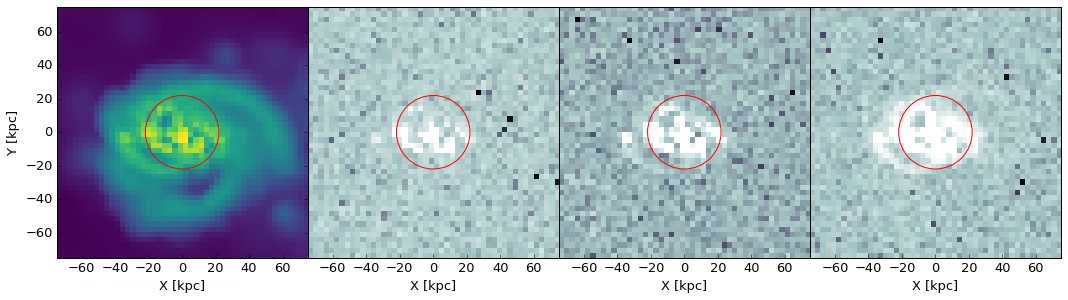

In [86]:
size = 150.
extent = [-150./2.,150./2.,-150./2.,150./2.]
print extent
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(18, 6))
makemap(rawsimmasked_cutout_10.data,ax=ax1,colorbar=False,extent=extent,labelaxes=True)#,bounds=bounds)
map = 'bone'; label = 'noise added + mask'; 
plotimgnice2(noisemasked_cutout_10.data,ax2,mymap=map,extent=extent,labelaxes=True)
plotimgnice2(noisemasked_cutout_100.data,ax3,mymap=map,extent=extent,labelaxes=True)
plotimgnice2(noisemasked_cutout_1000.data,ax4,mymap=map,extent=extent,labelaxes=True)

print noisemasked_cutout_10.data.shape
print noisemasked_cutout_100.data.shape
print noisemasked_cutout_1000.data.shape

for ax in [ax2,ax3,ax4]:
    ax.set_yticklabels([])
    ax.set_ylabel('')
    ax.set_yticks([])
for ax in [ax1,ax2,ax3,ax4]:
    circle1 = plt.Circle((0,0),radius=4.39*5., color='red',fill=False) # rhstar = 4.39
    ax.add_artist(circle1)

fig.subplots_adjust( hspace=0.07 , wspace = 0.0, top=.85)

plt.savefig('make_mockobs_galaxycutout_compareexptimes_horizontal.png')

[-75.0, 75.0, -75.0, 75.0]
actual min: 1044191.10437
mymin: 1045214.51419
actual min: 10462209.3939
mymin: 10465445.6057
actual min: 104693440.776
mymin: 104703674.488


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10


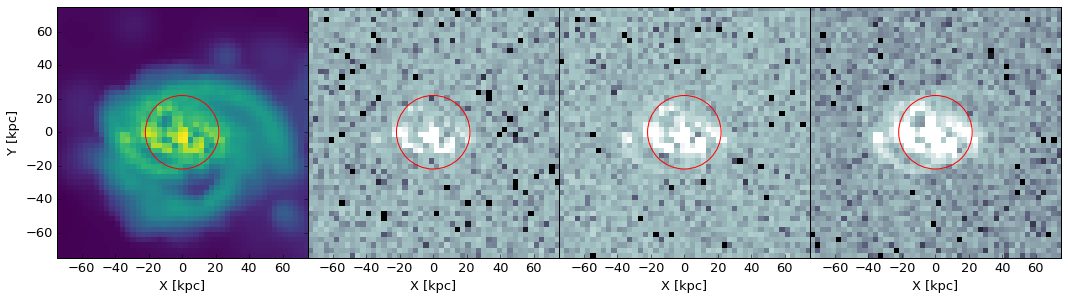

In [96]:
size = 150.
extent = [-150./2.,150./2.,-150./2.,150./2.]
print extent
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(18, 6))
makemap(rawsimmasked_cutout_10.data,ax=ax1,colorbar=False,extent=extent,labelaxes=True)#,bounds=bounds)
map = 'bone'; label = 'noise added + mask'; 
plotimgnice4(noisemasked_cutout_10.data,ax2,mymap=map,extent=extent,labelaxes=True)
plotimgnice4(noisemasked_cutout_100.data,ax3,mymap=map,extent=extent,labelaxes=True)
plotimgnice4(noisemasked_cutout_1000.data,ax4,mymap=map,extent=extent,labelaxes=True)

for ax in [ax2,ax3,ax4]:
    ax.set_yticklabels([])
    ax.set_ylabel('')
    ax.set_yticks([])
for ax in [ax1,ax2,ax3,ax4]:
    circle1 = plt.Circle((0,0),radius=4.39*5., color='red',fill=False) # rhstar = 4.39
    ax.add_artist(circle1)

fig.subplots_adjust( hspace=0.07 , wspace = 0.0, top=.85)

plt.savefig('make_mockobs_galaxycutout_compareexptimes_horizontal_2.png')

In [97]:
"""
# ran on April 27th, 2018 # run with size = 250kpc

from astropy.io import fits

hdu = fits.PrimaryHDU(data=noisemasked_cutout_10.data)
hdulist = fits.HDUList([hdu])
hdulist.writeto('CGM_mockobs_10hours.fits',clobber=True)
hdulist.close()

noisemasked_cutout_10_masked = np.where(noisemasked_cutout_10.mask, np.nan, noisemasked_cutout_10)
hdu = fits.PrimaryHDU(data=noisemasked_cutout_10_masked)
hdulist = fits.HDUList([hdu])
hdulist.writeto('CGM_mockobs_10hours_masked.fits',clobber=True)
hdulist.close()

hdu = fits.PrimaryHDU(data=noisemasked_cutout_100.data)
hdulist = fits.HDUList([hdu])
hdulist.writeto('CGM_mockobs_100hours.fits',clobber=True)
hdulist.close()

noisemasked_cutout_100_masked = np.where(noisemasked_cutout_100.mask, np.nan, noisemasked_cutout_100)
hdu = fits.PrimaryHDU(data=noisemasked_cutout_100_masked)
hdulist = fits.HDUList([hdu])
hdulist.writeto('CGM_mockobs_100hours_masked.fits',clobber=True)
hdulist.close()

hdu = fits.PrimaryHDU(data=noisemasked_cutout_1000.data)
hdulist = fits.HDUList([hdu])
hdulist.writeto('CGM_mockobs_1000hours.fits',clobber=True)
hdulist.close()

noisemasked_cutout_1000_masked = np.where(noisemasked_cutout_1000.mask, np.nan, noisemasked_cutout_1000)
hdu = fits.PrimaryHDU(data=noisemasked_cutout_1000_masked)
hdulist = fits.HDUList([hdu])
hdulist.writeto('CGM_mockobs_1000hours_masked.fits',clobber=True)
hdulist.close()
"""

In [119]:
def plotimgnice4(SBdata_exp0,ax,extent=None,mymap='gist_gray',label='',mask=None,labelaxes=False):
    """
    If the data is masked it's going to look weird because of limit changing going on here
    Pass the mask to this script and it will reapply the mask to the data after messing around with the limits to make
    the plot look nice.
    """
    # Plot the data nicely
    median = np.median(SBdata_exp0);
    sig = np.sqrt(median)

    mymax = median + 50*sig
   # mymin = median - 3*sig
    mymin = np.min(SBdata_exp0) + 1.25*sig
    
  #  mymin = np.min(SBdata_exp0) + sig

    print 'actual min: %s'%np.min(SBdata_exp0)
    print 'mymin: %s'%mymin 
    
    SBdata_clipped = SBdata_exp0 + 0
    SBdata_clipped[SBdata_clipped < mymin] = mymin
    SBdata_clipped[SBdata_clipped > mymax] = mymax
    SBdata_clipped = SBdata_clipped - mymin
    
    if mask is not None:
        SBdata_clipped[mask]=0

    makemap(np.log10(SBdata_clipped**0.02),ax,contours=False,mockobs=True,colmap=mymap,label=label,\
            labelaxes=labelaxes,extent=extent)


[-75.0, 75.0, -75.0, 75.0]
actual min: 1043102.4202
mymin: 1043102.4202
actual min: 1043102.4202
mymin: 1043102.4202
actual min: 10461500.548
mymin: 10461500.548
actual min: 10461500.548
mymin: 10461500.548
actual min: 104694022.721
mymin: 104694022.721
actual min: 104694022.721
mymin: 104694022.721
(48, 48)
[-75.0, 75.0, -75.0, 75.0]


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:135: RuntimeWarning: divide by zero encountered in log10


actual min: 1043102.4202
mymin: 1043102.4202
actual min: 10461500.548
mymin: 10465545.8373
actual min: 104694022.721
mymin: 104706814.878


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10


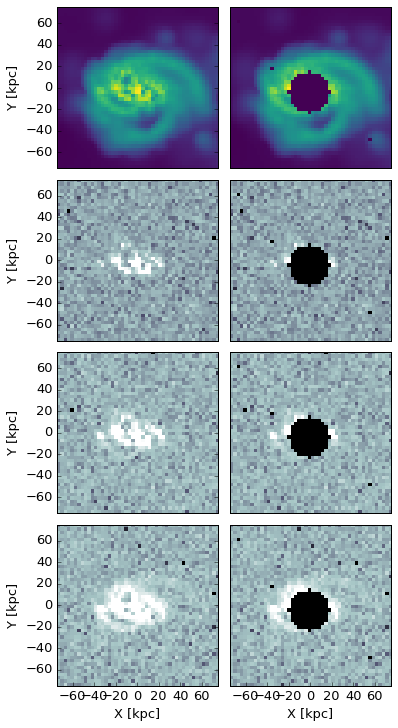

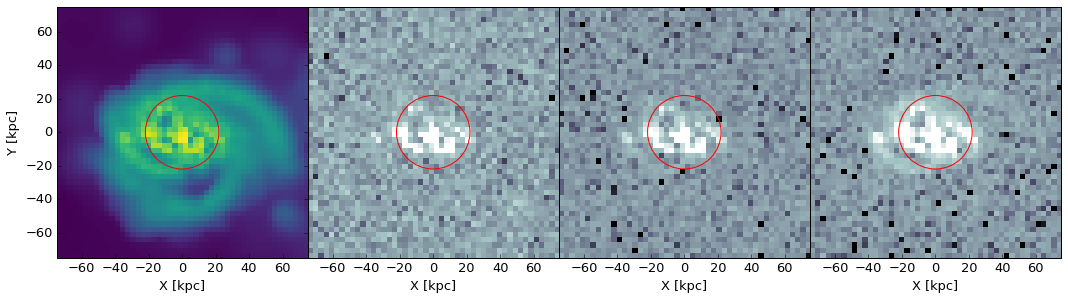

In [120]:
fromfile10 = fits.getdata('CGM_mockobs_27Apr18/CGM_mockobs_10hours.fits')
fromfile100 = fits.getdata('CGM_mockobs_27Apr18/CGM_mockobs_100hours.fits')
fromfile1000 = fits.getdata('CGM_mockobs_27Apr18/CGM_mockobs_1000hours.fits')

fromfile10 = fromfile10[16:64,16:64]
fromfile100 = fromfile100[16:64,16:64]
fromfile1000 = fromfile1000[16:64,16:64]

size = 150.
extent = [-150./2.,150./2.,-150./2.,150./2.]
print extent
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4, 2, figsize=(6, 13))
#plotdata(rawsimmasked_cutout_10.data.T,ax=ax1,colorbar=False,extent=extent)#,bounds=bounds)
#plotdata(rawsimmasked_cutout_10.T,ax=ax2,colorbar=False,extent=extent)#,bounds=bounds)
makemap(rawsimmasked_cutout_10.data,ax=ax1,colorbar=False,extent=extent,labelaxes=True)#,bounds=bounds)
makemap(rawsimmasked_cutout_10,ax=ax2,colorbar=False,extent=extent,labelaxes=True)#,bounds=bounds)
  
map = 'bone'; label = 'noise added + mask'; 
plotimgnice2(fromfile10,ax3,mymap=map,extent=extent,labelaxes=True)
plotimgnice2(fromfile10,ax4,mymap=map,mask=noisemasked_cutout_10.mask,extent=extent,labelaxes=True)
#plotimgnice4(noisemasked_cutout_10.data,ax3,mymap=map,extent=extent,labelaxes=True)
#plotimgnice4(noisemasked_cutout_10,ax4,mymap=map,mask=noisemasked_cutout_10.mask,extent=extent,labelaxes=True)

plotimgnice2(fromfile100,ax5,mymap=map,extent=extent,labelaxes=True)
plotimgnice2(fromfile100,ax6,mymap=map,mask=noisemasked_cutout_100.mask,extent=extent,labelaxes=True)
#plotimgnice4(noisemasked_cutout_100.data,ax5,mymap=map,extent=extent,labelaxes=True)
#plotimgnice4(noisemasked_cutout_100,ax6,mymap=map,mask=noisemasked_cutout_100.mask,extent=extent,labelaxes=True)

plotimgnice2(fromfile1000,ax7,mymap=map,extent=extent,labelaxes=True)
plotimgnice2(fromfile1000,ax8,mymap=map,mask=noisemasked_cutout_1000.mask,extent=extent,labelaxes=True)
#plotimgnice4(noisemasked_cutout_1000.data,ax7,mymap=map,extent=extent,labelaxes=True)
#plotimgnice4(noisemasked_cutout_1000,ax8,mymap=map,mask=noisemasked_cutout_1000.mask,extent=extent,labelaxes=True)

for ax in [ax2,ax4,ax6,ax8]:
    ax.set_yticklabels([])
    ax.set_ylabel('')
    ax.set_yticks([])
for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_xlabel('')

print fromfile1000.shape

fig.subplots_adjust( hspace=0.07 , wspace = 0.07, top=.85)

#plt.savefig('make_mockobs_galaxycutout_compareexptimes.png')

size = 150.
extent = [-150./2.,150./2.,-150./2.,150./2.]
print extent
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(18, 6))
makemap(rawsimmasked_cutout_10.data,ax=ax1,colorbar=False,extent=extent,labelaxes=True)#,bounds=bounds)
map = 'bone'; label = 'noise added + mask'; 
plotimgnice2(fromfile10,ax2,mymap=map,extent=extent,labelaxes=True)
plotimgnice4(fromfile100,ax3,mymap=map,extent=extent,labelaxes=True)
plotimgnice4(fromfile1000,ax4,mymap=map,extent=extent,labelaxes=True)

for ax in [ax2,ax3,ax4]:
    ax.set_yticklabels([])
    ax.set_ylabel('')
    ax.set_yticks([])
for ax in [ax1,ax2,ax3,ax4]:
    circle1 = plt.Circle((0,0),radius=4.39*5., color='red',fill=False) # rhstar = 4.39
    ax.add_artist(circle1)

fig.subplots_adjust( hspace=0.07 , wspace = 0.0, top=.85)

#plt.savefig('make_mockobs_galaxycutout_compareexptimes_horizontal_2.png')

## Inset galaxy

NGC 300:
- r_halflight = 5.00 arcminutes [1]
- downloaded from DSS, 5x(5.00 arcmin)x2 = 50 arcmin square box around the galaxy [2]
- actually stellar light goes out almost as far as the inset, but no pretty pictures [3] 
- gas also has been measured out about as far as the inset [4]

[1] McConnachie, A. "The observed properties of dwarf galaxies in and around the Local
Group" https://arxiv.org/pdf/1204.1562.pdf <br>
[2] ESO Online DSS http://archive.eso.org/dss/dss <br>
[3] Bland-Hawthorn et al. 2005 "NGC 300: AN EXTREMELY FAINT, OUTER STELLAR DISK OBSERVED TO 10 SCALE LENGTHS" http://iopscience.iop.org/article/10.1086/430512 <br>
[4] Westmeier et al. 2011 "Gas and dark matter in the Sculptor group: NGC 300" https://arxiv.org/abs/1009.0317

In [5]:
ngc300 = fits.getdata('dss.00.54.53.5-37.41.03.8.fits')

In [46]:
def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,ylabelside='left'):
   # ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    ax.patch.set_facecolor('white') # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest')#,vmin=-4.5,vmax=8)
    if labelaxes:
        fontsize=13
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.locator_params(axis='y', nticks=3)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
        ax.xaxis.set_label_position('top') 
        ax.xaxis.tick_top()
        if ylabelside=='right':
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position('right')
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        cax = div.append_axes("top",size="5%",pad=0.1)
        cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white',fontsize=9)


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


(1765, 1765)
(1766, 1766)


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1766 but corresponding boolean dimension is 1765
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


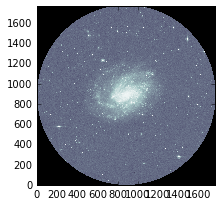

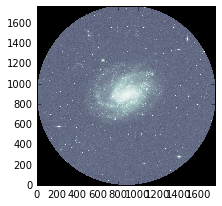

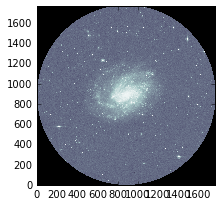

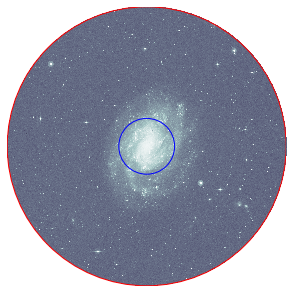

In [47]:
plotdata(np.log10(ngc300),colorbar=False,colmap='bone')#,bounds=bounds)
piecemask = skimagemorphology.disk(ngc300.shape[0]/2 - 1)
print piecemask.shape
print ngc300.shape
ngc300_masked = np.ma.masked_where(piecemask==0,ngc300[0:piecemask.shape[0],0:piecemask.shape[0]])
plotdata(np.log10(ngc300_masked),colorbar=False,colmap='bone')#,bounds=bounds)

ngc300_circular = ngc300+0
ngc300_circular[piecemask==0]=0
plotdata(np.log10(ngc300_circular),colorbar=False,colmap='bone')#,bounds=bounds)
fig, (ax) = plt.subplots(1, 1, figsize=(5, 5))
#pltimg(np.log10(ngc300_circular),ax,[-25,-25],[50,50],colmap = 'bone')
xystarts = [-25,-25]; size = [50,50]; colmap='bone'
ax.patch.set_facecolor('white') # sets background color to lowest color map value
img = ax.imshow(np.log10(ngc300_circular).T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest')#,vmin=-4.5,vmax=8)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_axis_off()
circle1 = plt.Circle((0,0),radius=5, color='blue',fill=False)
ax.add_artist(circle1)
circle1 = plt.Circle((0,0),radius=25, color='red',fill=False)
ax.add_artist(circle1)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:77: RuntimeWarning: divide by zero encountered in log10


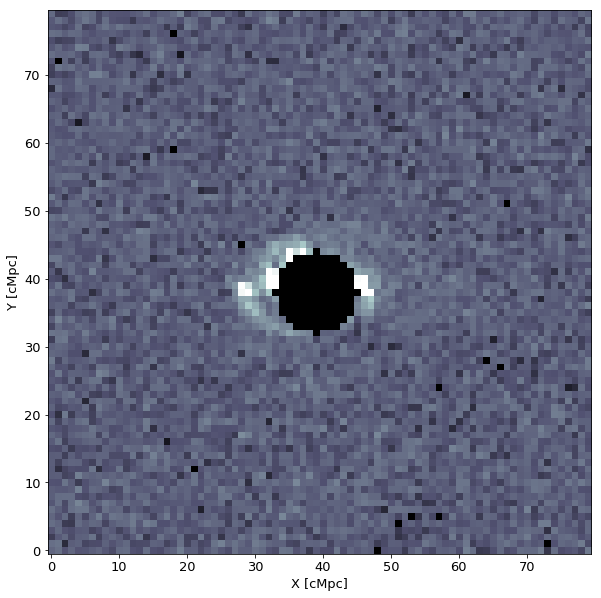

In [29]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))

plotimgnice(noisemasked_cutout_1000,ax1,mymap=map,mask=noisemasked_cutout_1000.mask)
#img = ax1.imshow(ngc300,origin='lower',extent=(33,47,33,47),cmap=cm.get_cmap('bone'),interpolation='nearest')

blended = Image.blend(im1, im2, alpha=0.5)
blended.save("blended.png")

In [24]:
40-7

33

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1766 but corresponding boolean dimension is 1765
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  """
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  import sys
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


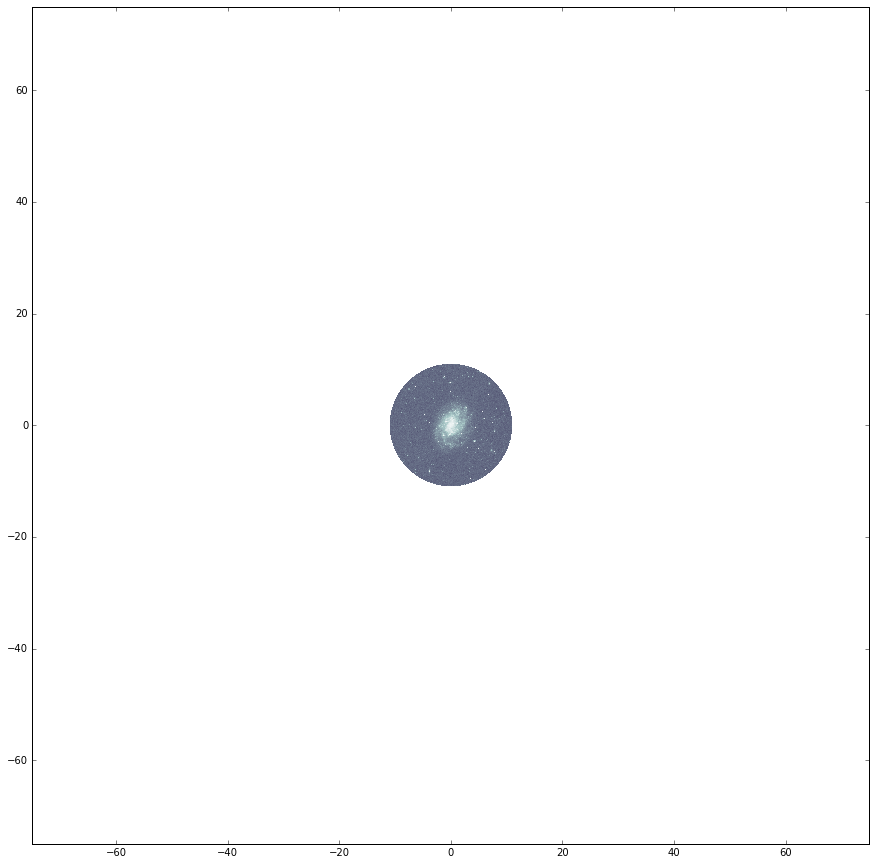

In [48]:
ngc300 = fits.getdata('dss.00.54.53.5-37.41.03.8.fits')
piecemask = skimagemorphology.disk(ngc300.shape[0]/2 - 1)
ngc300[piecemask==0]=0
## put it into a larger array ; ngc300.shape[0] is 5*rhstar = 21.95, 
fullngc300 = np.zeros((ngc300.shape[0]/21.95*150.,ngc300.shape[0]/21.95*150.))
midpix=ngc300.shape[0]/21.95*150./2.
fullngc300[midpix-ngc300.shape[0]/2:midpix+ngc300.shape[0]/2,midpix-ngc300.shape[0]/2:midpix+ngc300.shape[0]/2]=ngc300

fig, (ax) = plt.subplots(1, 1, figsize=(15, 15))
#pltimg(np.log10(ngc300_circular),ax,[-25,-25],[50,50],colmap = 'bone')
xystarts = [-75,-75]; size = [150,150]; colmap='bone'
ax.patch.set_facecolor('white') # sets background color to lowest color map value
img = ax.imshow(np.log10(fullngc300).T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest')#,vmin=-4.5,vmax=8)


In [49]:
fullngc300.shape

(12068, 12068)